Imports

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading in Data

In [35]:
seasonstats_df = pd.read_csv(r'Data\seasonstats.csv')


Exploring the Dataset

In [36]:
# First five rows of the dataset
seasonstats_df.head()

,Unnamed: 0,Season,Squad,W,D,L,GF,GA,Pts,Sh,...,PK,Cmp,Att,Cmp%,CK,CrdY,CrdR,Fls,PKcon,OG
0,0,2023/2024,Manchester City,28,7,3,96,34,91,647.0,...,10.0,19094.0,22558.0,84.6,265.0,64.0,2.0,391.0,3.0,1.0
1,1,2023/2024,Arsenal,28,5,5,91,29,89,511.0,...,4.0,16133.0,19363.0,83.3,231.0,94.0,2.0,412.0,2.0,4.0
2,2,2023/2024,Liverpool,24,10,4,86,41,82,539.0,...,2.0,11899.0,15920.0,74.7,235.0,79.0,3.0,507.0,7.0,1.0
3,3,2023/2024,Aston Villa,20,8,10,76,61,68,470.0,...,3.0,12551.0,16818.0,74.6,184.0,89.0,2.0,385.0,2.0,0.0
4,4,2023/2024,Tottenham,20,6,12,74,61,66,555.0,...,5.0,21810.0,25029.0,87.1,206.0,90.0,3.0,414.0,6.0,2.0


In [37]:
# Columns in the dataset
seasonstats_df.columns

# This seems to be the most useful datset, as I could try to predict the number of points a
# team will score during the course of a season

Index(['Unnamed: 0', 'Season', 'Squad', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'Sh',
       'SoT', 'FK', 'PK', 'Cmp', 'Att', 'Cmp%', 'CK', 'CrdY', 'CrdR', 'Fls',
       'PKcon', 'OG'],
      dtype='object')

In [38]:
# Are there any duplicate rows?
seasonstats_df.duplicated().any()

False

In [39]:
# How many rows and columns does the dataset have?
seasonstats_df.shape

(2563, 22)

In [40]:
# Do any rows contain nulls?
seasonstats_df.info()
# have lots of na's 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2563 non-null   int64  
 1   Season      2563 non-null   object 
 2   Squad       2563 non-null   object 
 3   W           2563 non-null   int64  
 4   D           2563 non-null   int64  
 5   L           2563 non-null   int64  
 6   GF          2563 non-null   int64  
 7   GA          2563 non-null   int64  
 8   Pts         2563 non-null   int64  
 9   Sh          140 non-null    float64
 10  SoT         646 non-null    float64
 11  FK          140 non-null    float64
 12  PK          646 non-null    float64
 13  Cmp         140 non-null    float64
 14  Att         140 non-null    float64
 15  Cmp%        140 non-null    float64
 16  CK          140 non-null    float64
 17  CrdY        646 non-null    float64
 18  CrdR        626 non-null    float64
 19  Fls         500 non-null   

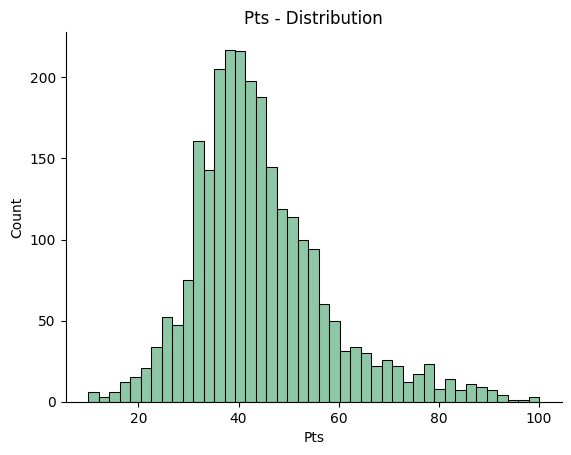

In [41]:
# Visualise the Distribution of Pts via a Histogram
g = sns.histplot(x= 'Pts', data = seasonstats_df, color = '#67B587')
g.set_title('Pts - Distribution')
sns.despine()
plt.show()

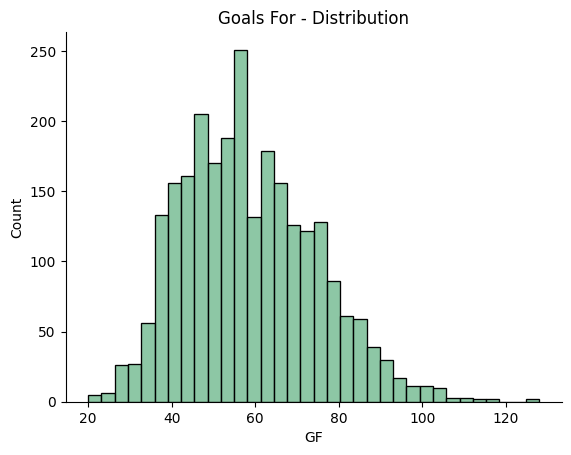

In [42]:
# Visualise the Distribution of GF via a Histogram
g = sns.histplot(x= 'GF', data = seasonstats_df, color = '#67B587')
g.set_title('Goals For - Distribution')
sns.despine()
plt.show()

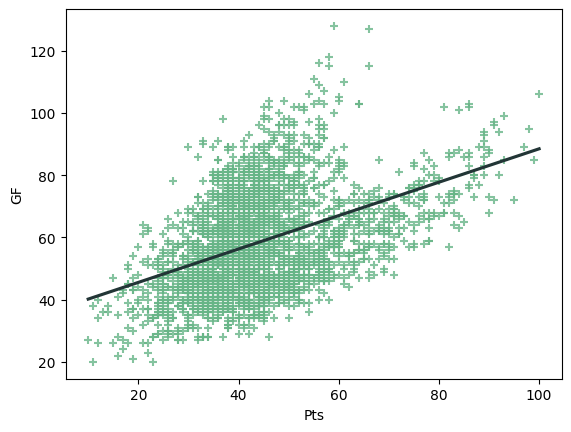

In [43]:
# Plot Pts against Goals For with a line of best fit
sns.regplot(x = 'Pts', y = 'GF', marker = '+', ci = None, data = seasonstats_df,
            scatter_kws={'color':'#67B587' }, line_kws = {'color':'#223536'})
plt.show()

# Line of best fit would appear to have a low r2 score

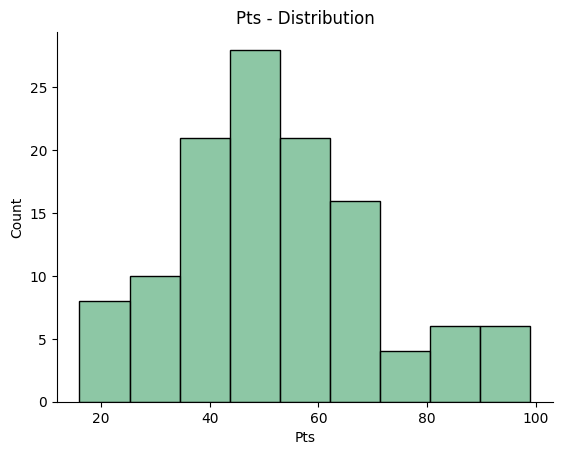

In [44]:
# Visualise the Distribution of Pts via a Histogram dropping na's
g = sns.histplot(x= 'Pts', data = seasonstats_df.dropna(), color = '#67B587')
g.set_title('Pts - Distribution')
sns.despine()
plt.show()

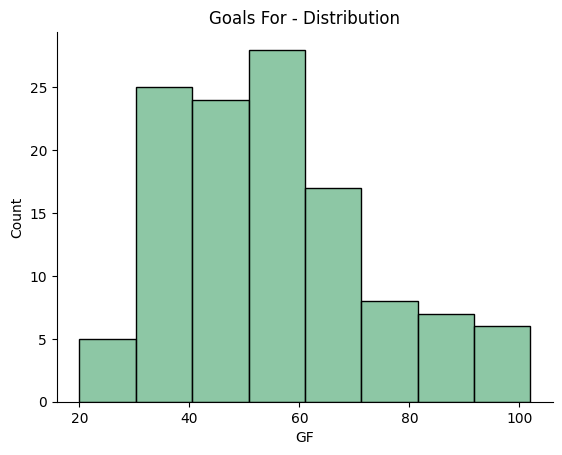

In [45]:
# Visualise the Distribution of GF via a Histogram dropping na's
g = sns.histplot(x= 'GF', data = seasonstats_df.dropna(), color = '#67B587')
g.set_title('Goals For - Distribution')
sns.despine()
plt.show()

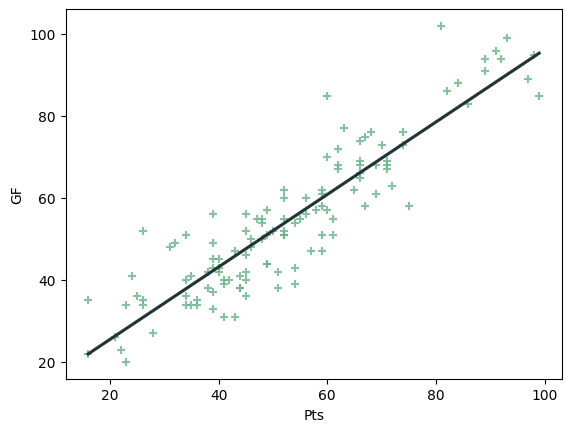

In [46]:
# Plot points against goals for with the datset without na's
sns.regplot(x = 'Pts', y = 'GF', marker = '+', ci = None, data = seasonstats_df.dropna(),
            scatter_kws={'color':'#67B587' }, line_kws = {'color':'#223536'})
plt.show()

# Line of best fit appears to have a much stronger r2 square

In [47]:
# How many rows in the dataset exluding rows with na's
seasonstats_df.dropna().shape

# this becomes really small - may not be the best approach to just drop nan'seasonstats_df
# Consider imputation

(120, 22)

In [48]:
# How many datapoints are missing from each column
is_missing = seasonstats_df.isna()
missing_per_column = is_missing.sum(axis = 0)
display(missing_per_column)

Unnamed: 0       0
Season           0
Squad            0
W                0
D                0
L                0
GF               0
GA               0
Pts              0
Sh            2423
SoT           1917
FK            2423
PK            1917
Cmp           2423
Att           2423
Cmp%          2423
CK            2423
CrdY          1917
CrdR          1937
Fls           2063
PKcon         2423
OG            2423
dtype: int64

In [49]:
# FOR FEATURE ENGINEERING

    # Need to bring in previous year data
    # Use imputation to handle missing data